## 1. Définir un objectif mesurable
**Objectif** : prédire si une personne est infecté en fonction des données cliniques disponibles.

**Métrique** : 
>*Classes équilibrées* : **Accuracy** -> 90% (Sur 100 prediction on a raison 90% du temps)

>*classes déséquilibrées* : **Précision** (TP/(TP + FP)) : permet de réduire au maximum le nombre de faux positif TFP  (éviter d'envoyer à l'hopital les gens qui n'ont pas corona)
    **Recall (sensibilité)** TP/(TP + FN)) : permet de réduire au maximum le TFN (éviter de laisser les gens ayant corona dans la nature)
    **Score F1 (rapport précision et recall)** : F1 -> 50%; Recall -> 70%                                                                
## 2. EDA (Exploratory Data Analysis
#### Objectif : 
* Se mettre à l'aise avec le dataset, 
* Comprendre au maximum les différentes variables, pour * Définir une stratégie de modélisation.

**Checklist de base (non-exhaustive) :**
* Identification de la target
* Nombre de lignes et de colonnes
* Types de variables
* Identification des valeurs manquantes

**Analyse du fond**:
* Visualisation de la target (Histogramme/Boxplot)
* Compréhension des différentes variables (Internet)
* Visualisation des différentes variables (Histogramme/Boxplot)
* Identification des outliers

## 3. Pre-processing
Transformer le dataset pour le mettre dans un format qui va être propice aux développement de modèles de ML.

**Checklist de base (non-exhaustive) :**
* Création du Train set/Test set
* Elimination des NaN : dropna(), imputation, colonnes "vides"
* Encodage (transformation des var catégorielles en variables numériques : Onehotencoding...)
* Suppression des outliers néfastes au modèles (généralement après le modèle de ML pour avoir leur ampleur)
* Feature Selection (éliminer les var de variance nulle, les variables redondantes) 
* Feature Engineering (créer de nouvelles variables en fonciton des variables existances : connaissance métier indispensable, le cas échéant : créer des variables polynomiales, réduire la dimensionalité du dataset après cet ajout de variable)
* Feature Scaling (Normalisation des données)

## 4. Modélisation
Créer un model de ML, de l'entrainer, de l'évaluer et d'essayer de l'améliorer aussi comparer les modèles en eux.

**Checklist de base (non-exhaustive) :**
* Définir une fonciton d'évaluation fiable et reproductible qui pourra être robuste au changement de données
* Entrainement de différents modèles 
* Optimisation avec GridSearchCV : optimiser les hyper-paramètres
* (Optionnel) Analyse des erreurs et retour au pre-processing / EDA
* Learning Curve et prise de decision : permet de savoir si l'augmentation des données est fonciton croissante des performances du modèle.

# Mise en pratique

In [ ]:
Exploration du dataset de corana virus (compétition Kaggle).
Lien d'accès : 

# 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
pd.set_option('display.max_row',111) #Afficher tous les resultats
pd.set_option('display.max_column',111)

In [3]:
data = pd.read_excel('dataset.xlsx')

In [22]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

#### Analyse de forme :

In [11]:
df = data.copy()

In [12]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [ ]:
# Target = SARS-Cov-2 exam result

In [13]:
df.shape #nb ligne, nb colone

(5644, 111)

In [19]:
df.dtypes #

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [18]:
df.dtypes.value_counts() #

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:ylabel='None'>

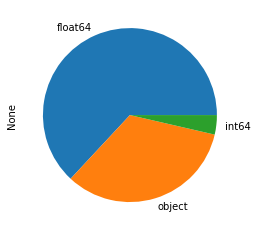

In [20]:
df.dtypes.value_counts().plot.pie() #

In [23]:
# Analyse des variables manquantes : visionage complet du dataset
df.isna() # verifie si une variable est not a number

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

<AxesSubplot:>

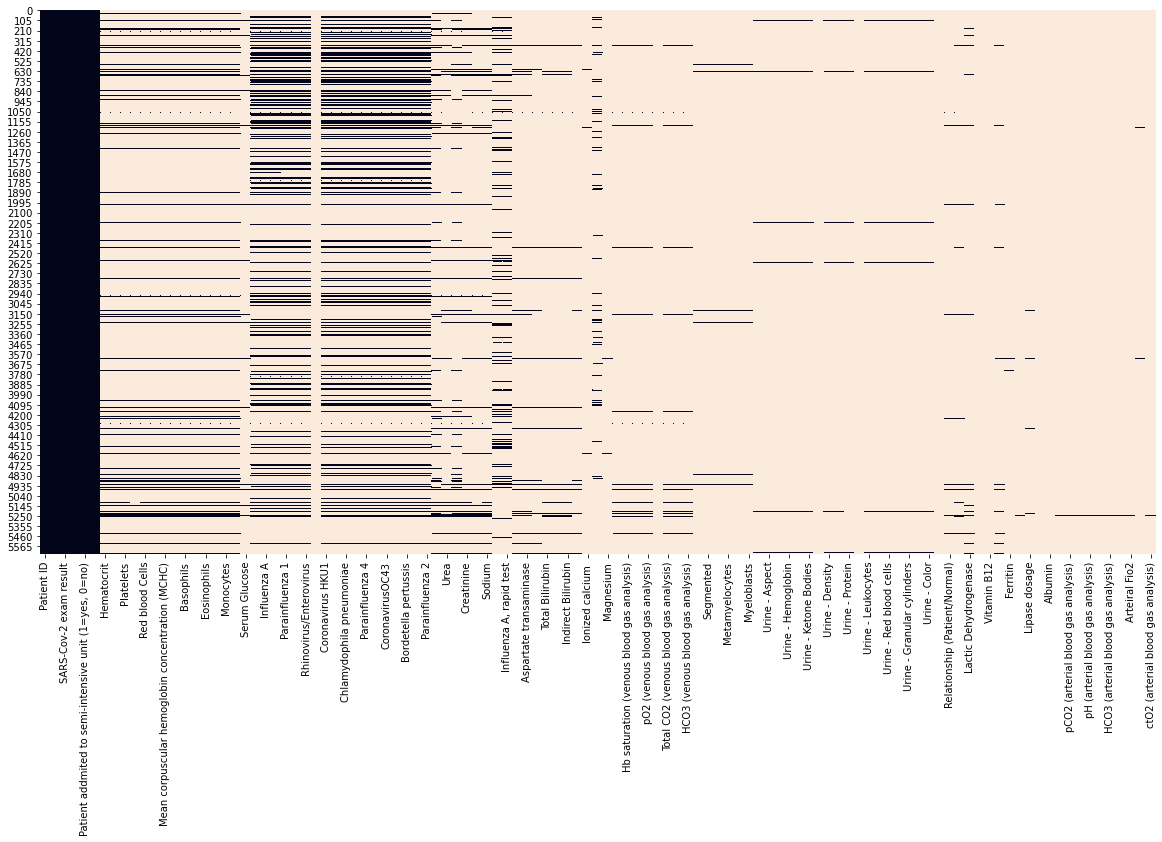

In [26]:
# Affichage avec seaborn
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) # avoir un appercu complet du dataset, avec les msvalues

In [30]:
# Pourcentage de msvalue
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)
# éliminer les variables avec plus de 90% des msvalues.

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse de fond
1. Visualisation initiale - Elimination des colonnes inutiles

In [32]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

<AxesSubplot:>

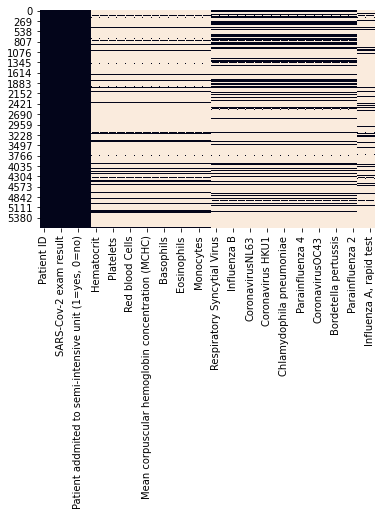

In [33]:
sns.heatmap(df.isna(), cbar=False)

In [34]:
df = df.drop('Patient ID', axis=1)

In [35]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [38]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [44]:
#### Varaible quantitatives

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

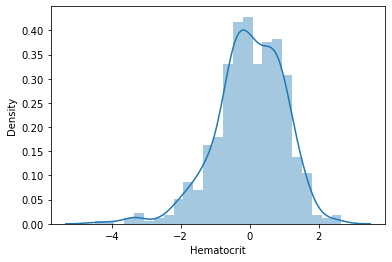

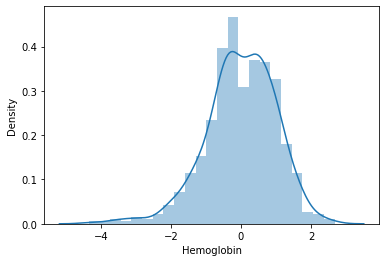

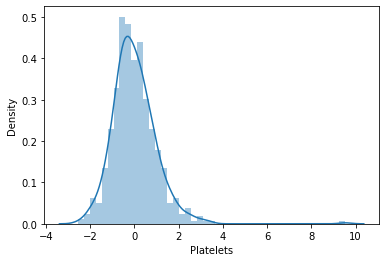

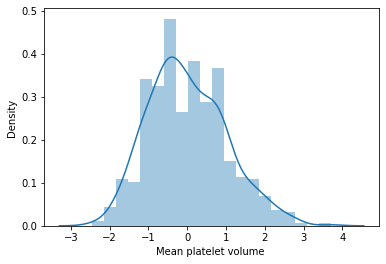

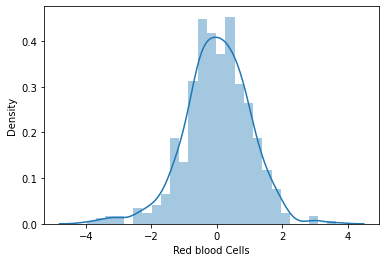

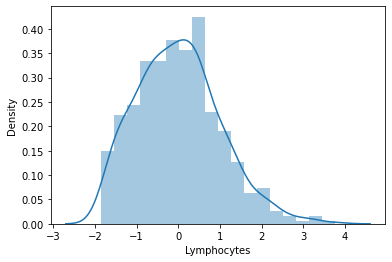

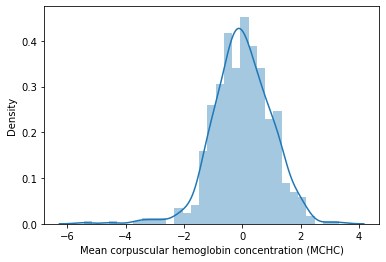

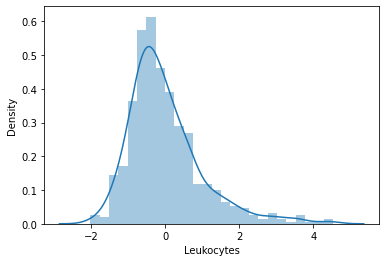

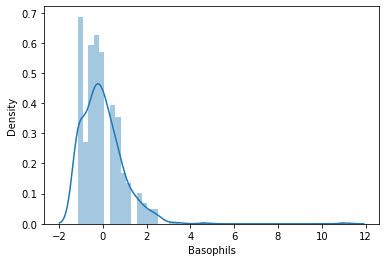

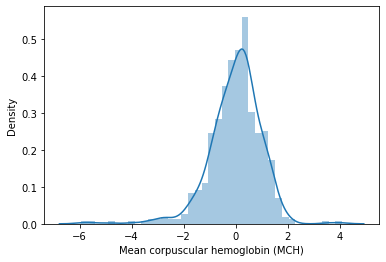

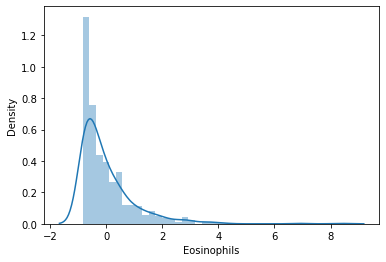

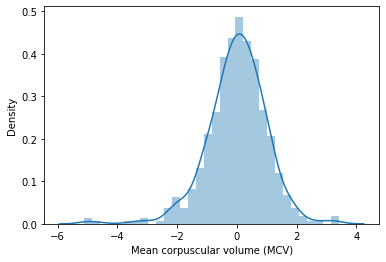

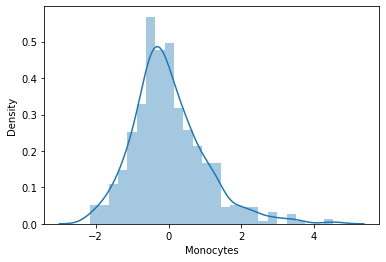

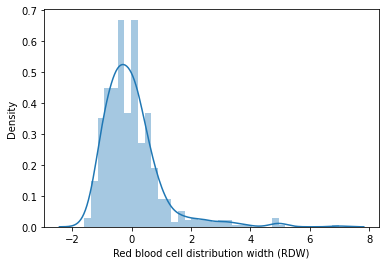

In [40]:
# Histogrammes des variables continues
for col in df.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(df[col])

In [41]:
# Les données ont été centralisée et la plupart suivent une dist normale.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

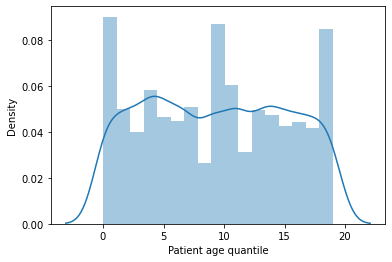

In [42]:
# Variable age
plt.figure()
sns.distplot(df['Patient age quantile'])

In [43]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

In [ ]:
#difficile d'interpréter ces données, elles sont clairement subbies une transformation initiale.

##### Variables qualitatives
Identifier les différentes caratégories pour visualiser les catégories

In [46]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [52]:
# Histogrammes des variables continues
for col in df.select_dtypes('object'):
    ''' Pour avoir les différentes catégories'''
    print(f'{col :-<30} {df[col].unique()}')

SARS-Cov-2 exam result-------- ['negative' 'positive']
Respiratory Syncytial Virus--- [nan 'not_detected' 'detected']
Influenza A------------------- [nan 'not_detected' 'detected']
Influenza B------------------- [nan 'not_detected' 'detected']
Parainfluenza 1--------------- [nan 'not_detected' 'detected']
CoronavirusNL63--------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus-------- [nan 'detected' 'not_detected']
Coronavirus HKU1-------------- [nan 'not_detected' 'detected']
Parainfluenza 3--------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------ [nan 'not_detected' 'detected']
Adenovirus-------------------- [nan 'not_detected' 'detected']
Parainfluenza 4--------------- [nan 'not_detected' 'detected']
Coronavirus229E--------------- [nan 'not_detected' 'detected']
CoronavirusOC43--------------- [nan 'not_detected' 'detected']
Inf A H1N1 2009--------------- [nan 'not_detected' 'detected']
Bordetella pertussis---------- [nan 'not_detected' 'detected']


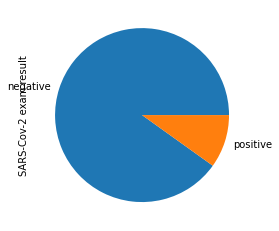

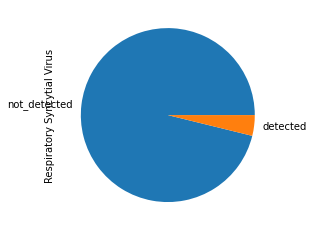

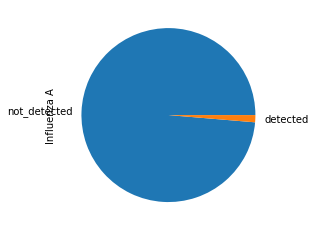

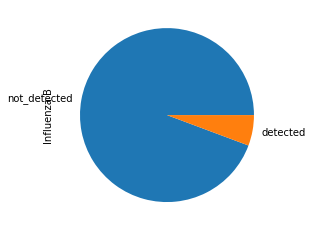

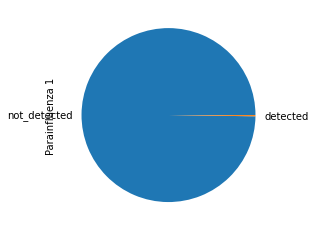

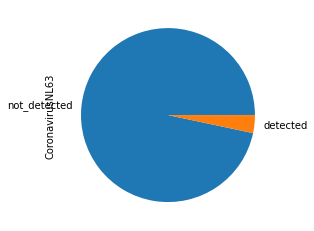

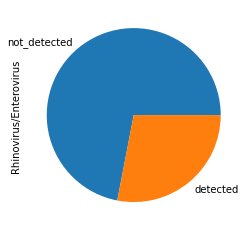

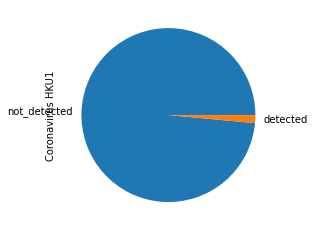

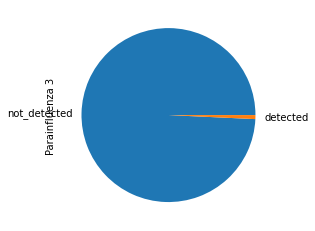

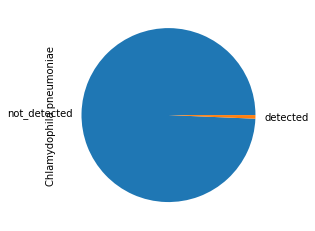

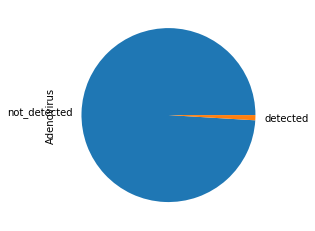

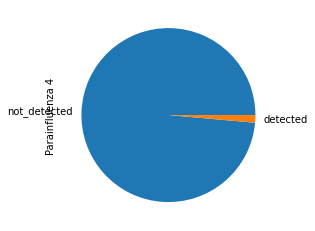

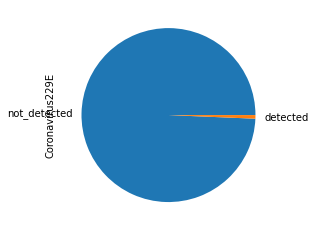

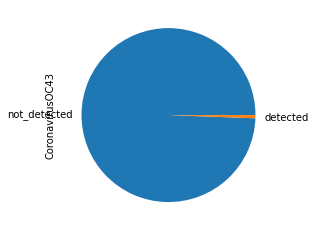

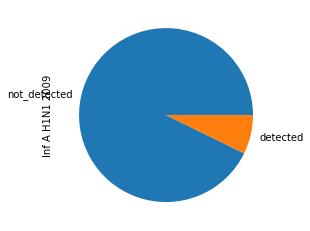

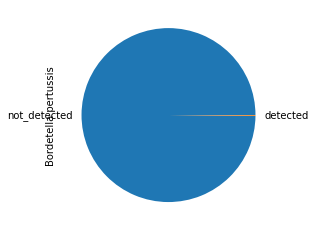

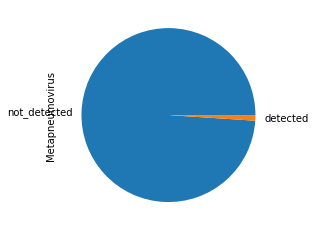

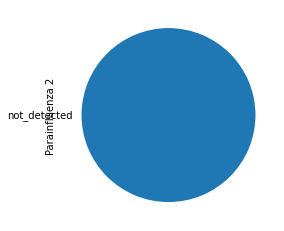

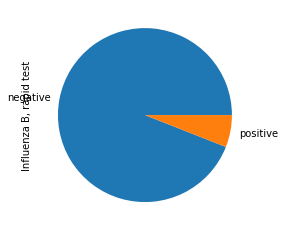

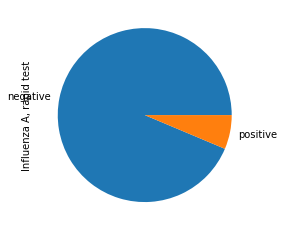

In [53]:
for col in df.select_dtypes('object'):
    ''' compter le nombre de catégories'''
    plt.figure()
    df[col].value_counts().plot.pie()

##### Relation variables target
* Création des sous-ensembles positifs et négatifs

In [65]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [66]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

* Création des ensembles Blood (89% des ms v) et viral (76% des ms v)

In [58]:
missing_rate = df.isna().sum()/df.shape[0]

In [64]:
# Toutes les colones de types test sangin
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [70]:
blood_columns.shape

(14,)

In [62]:
# Toutes les colones de types test sangin
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

#### Target / Blood

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


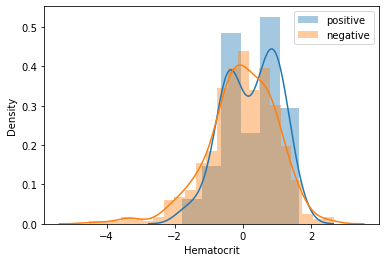

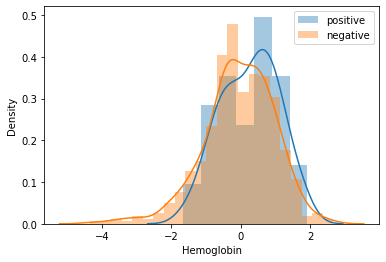

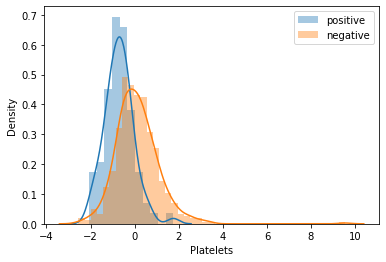

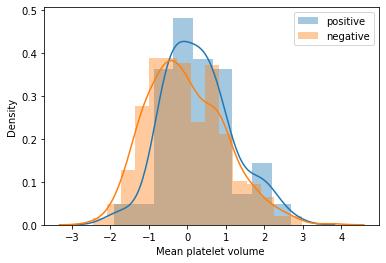

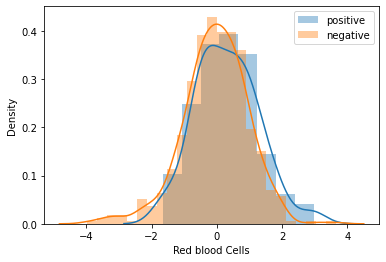

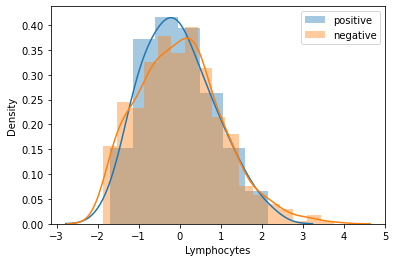

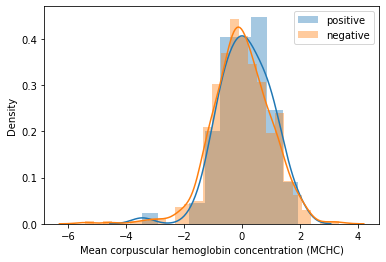

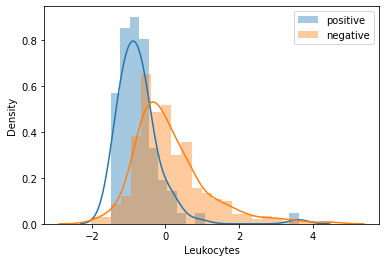

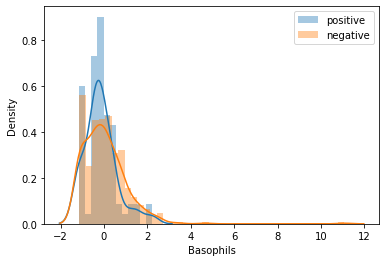

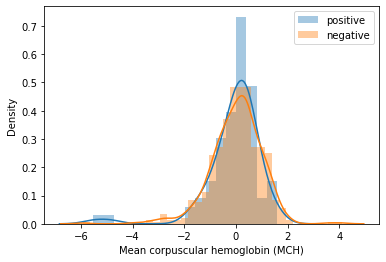

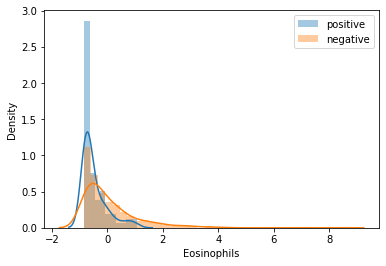

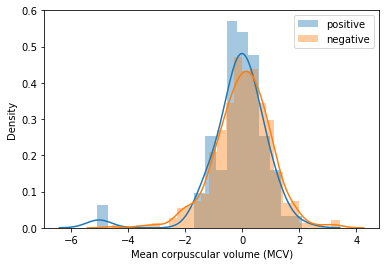

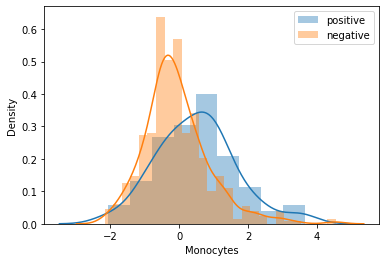

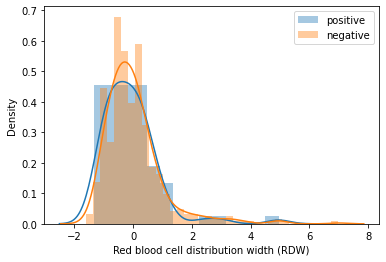

In [73]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

* conclusion : les taux de Mononcytes, Platelets, Leukocytes semblent liés au covid-19 => Hypothèse à tester.

* Relation target et l'âge

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

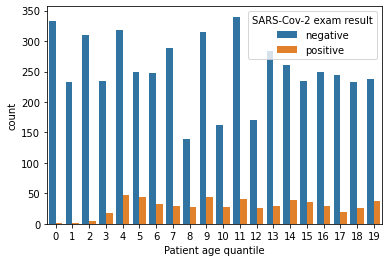

In [74]:
sns.countplot(x = 'Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

In [ ]:
# Il semblerait que l'âge soit lié au corona. Problème on ne connait exactement cette variable.

#### Relation target / Viral (var qualitative)

In [75]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

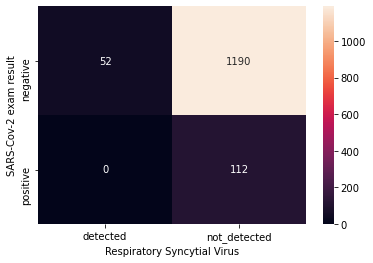

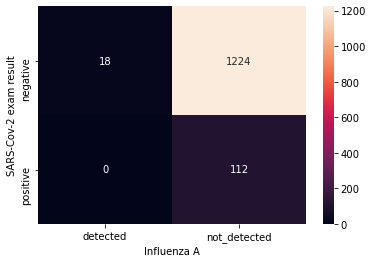

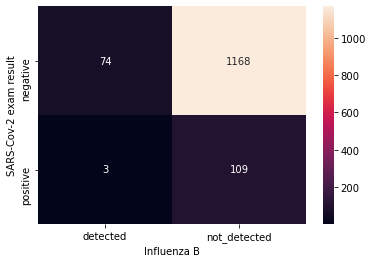

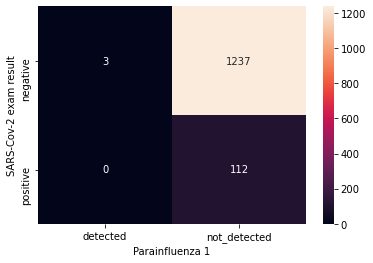

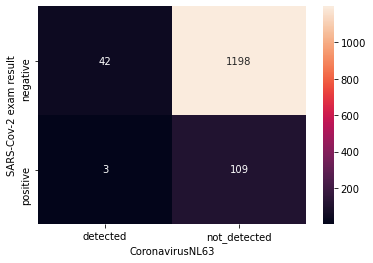

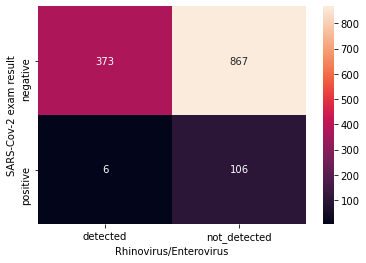

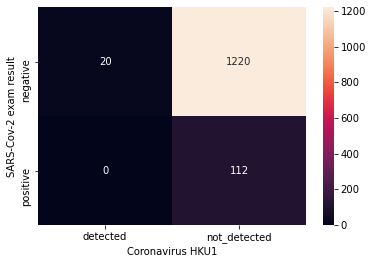

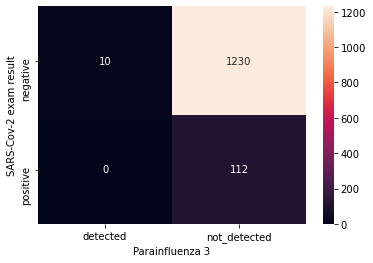

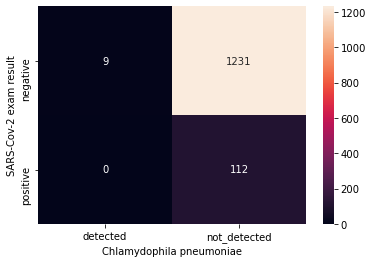

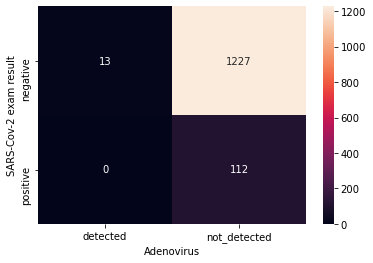

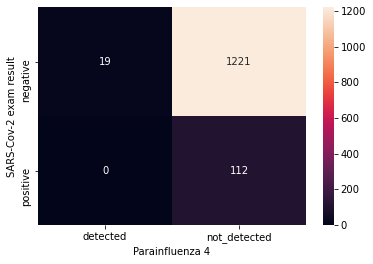

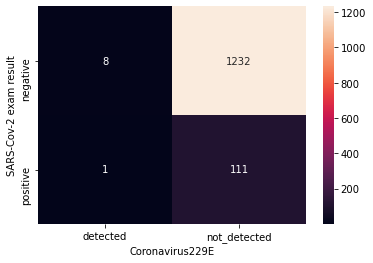

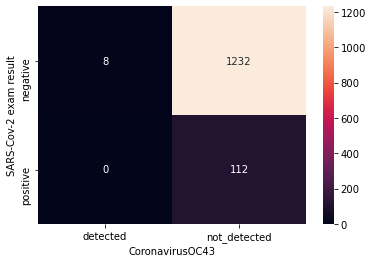

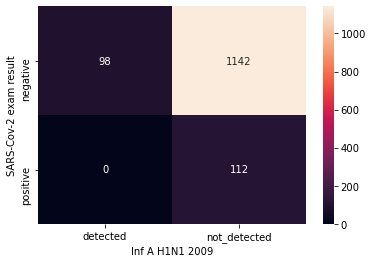

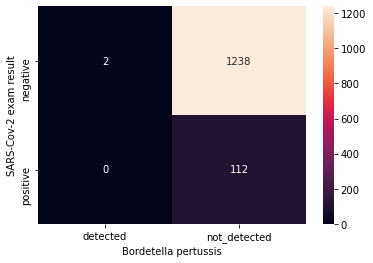

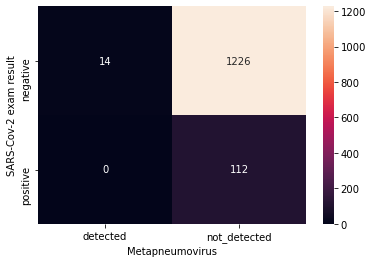

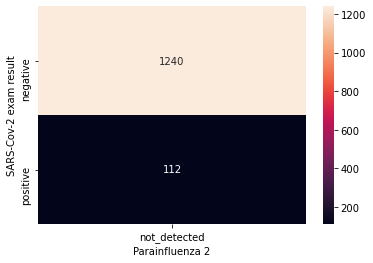

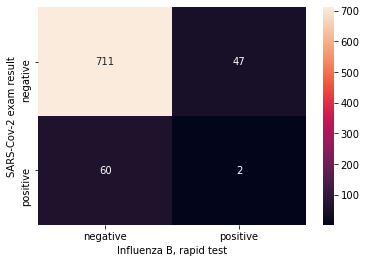

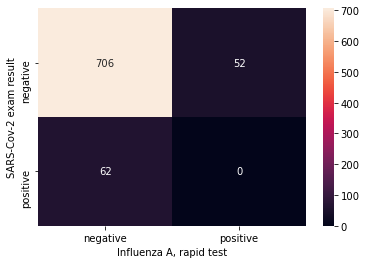

In [76]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d') #Option avoir les annotation et afficher les nombre en entier 

**Conclusion :** les doubles virus sont très rares. Rhinovirus/enterovirus positif - covid-19 négatif? -> Hypothèse à tester

#### Analyse plus détaillée
relation variable*variable.
* Relation les variables et au taux sanguin

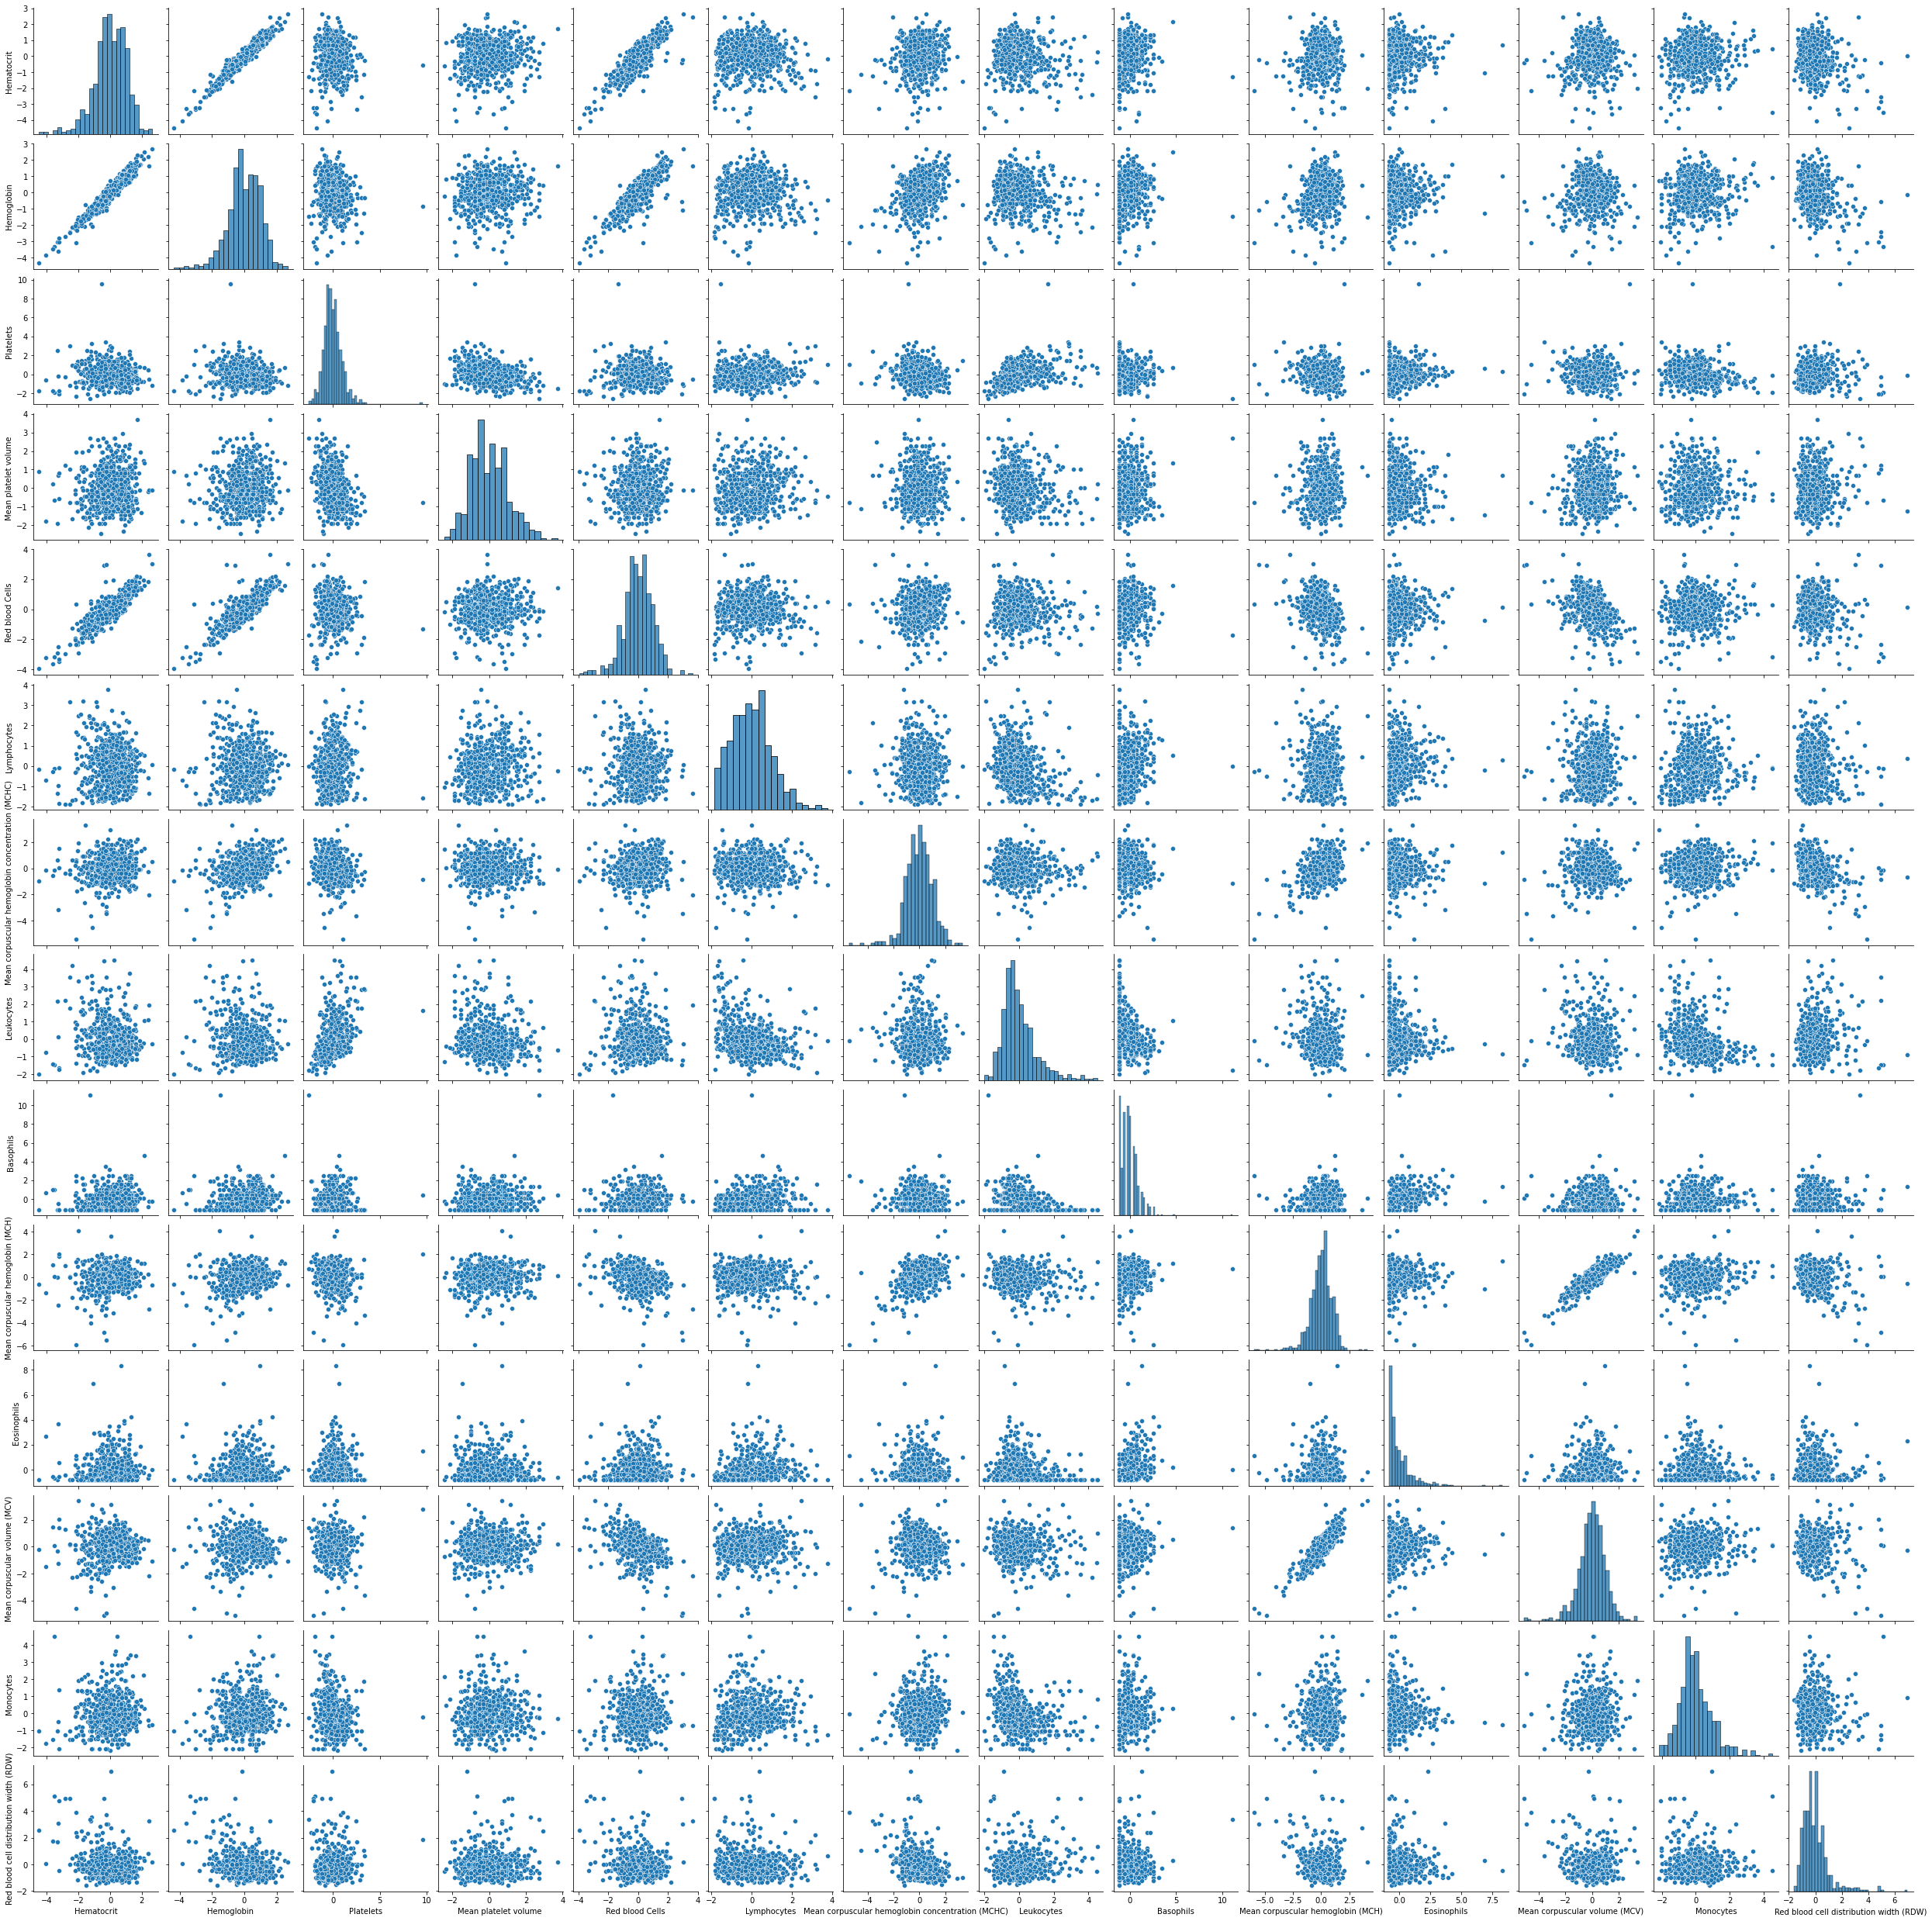

In [77]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

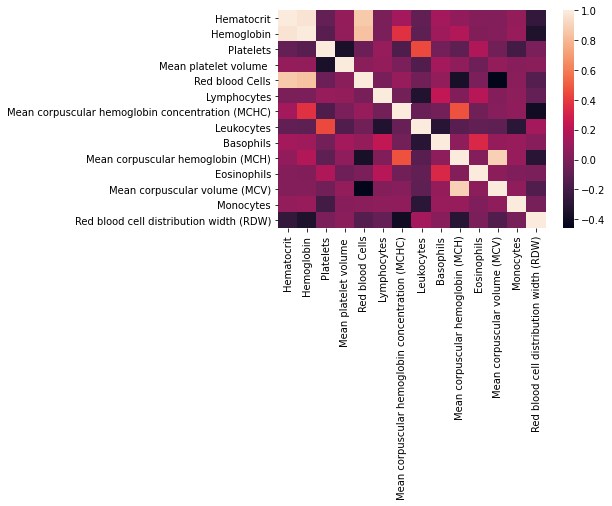

In [78]:
sns.heatmap(df[blood_columns].corr())

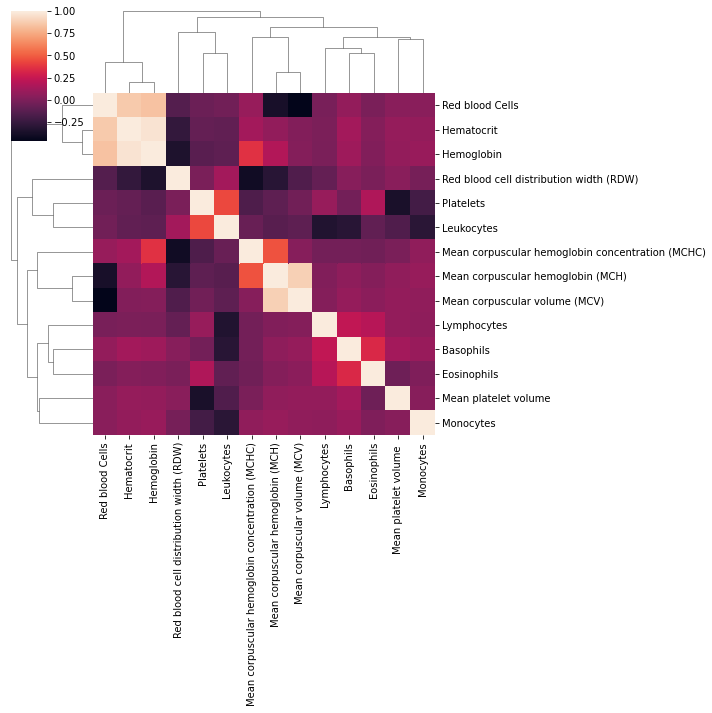

In [79]:
sns.clustermap(df[blood_columns].corr())

In [ ]:
#### Relation Age/sang

<ipython-input-81-85055022b5f3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

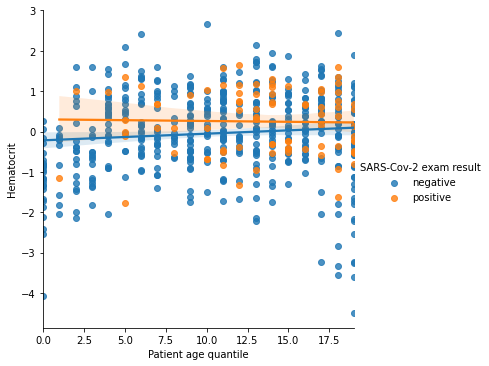

<Figure size 432x288 with 0 Axes>

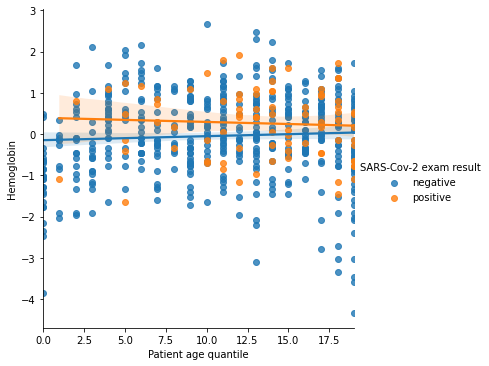

<Figure size 432x288 with 0 Axes>

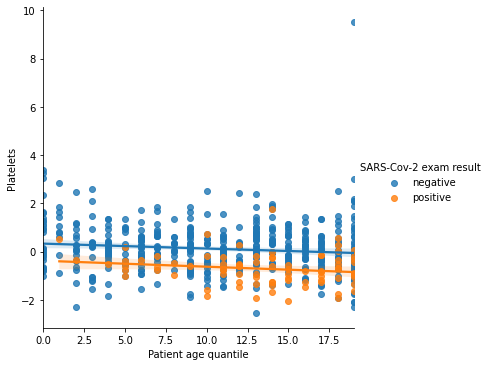

<Figure size 432x288 with 0 Axes>

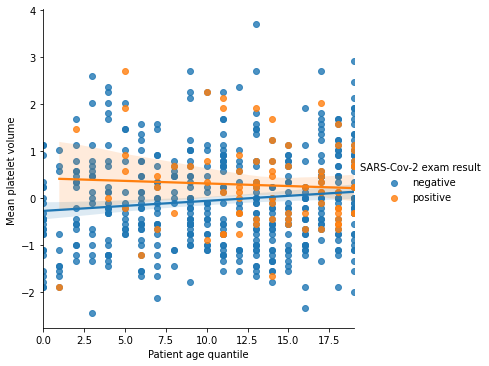

<Figure size 432x288 with 0 Axes>

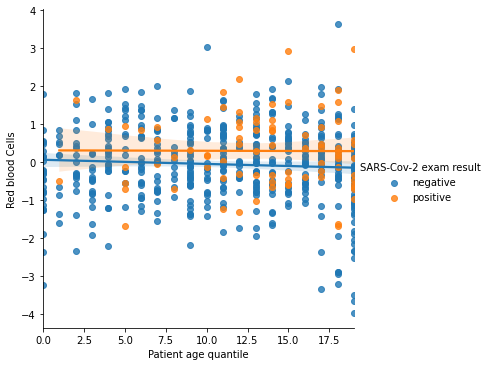

<Figure size 432x288 with 0 Axes>

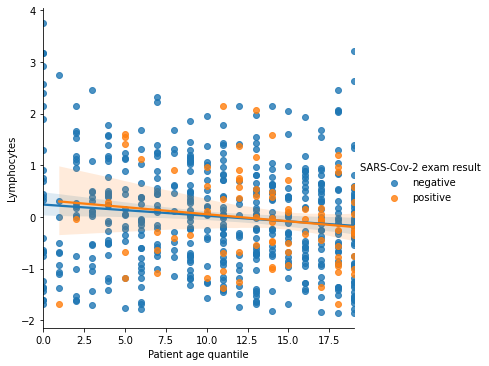

<Figure size 432x288 with 0 Axes>

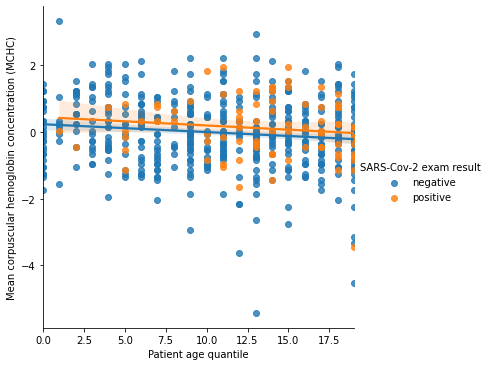

<Figure size 432x288 with 0 Axes>

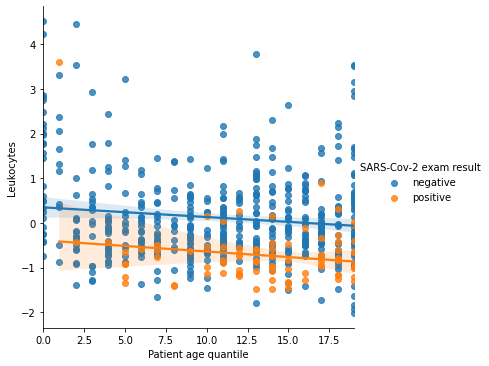

<Figure size 432x288 with 0 Axes>

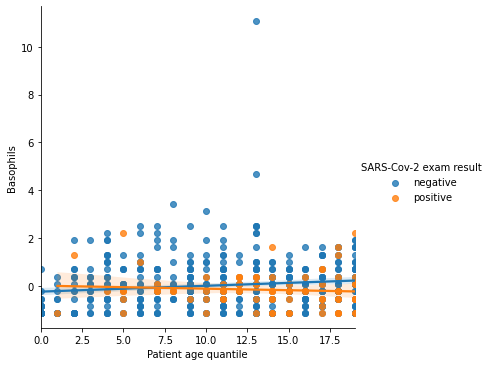

<Figure size 432x288 with 0 Axes>

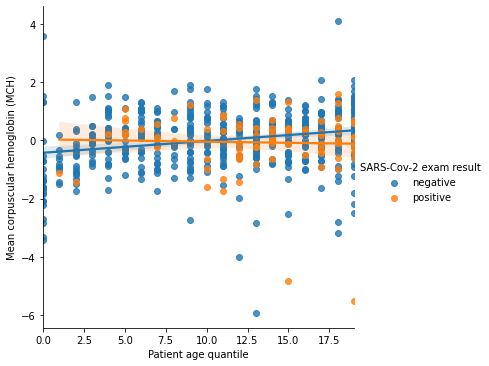

<Figure size 432x288 with 0 Axes>

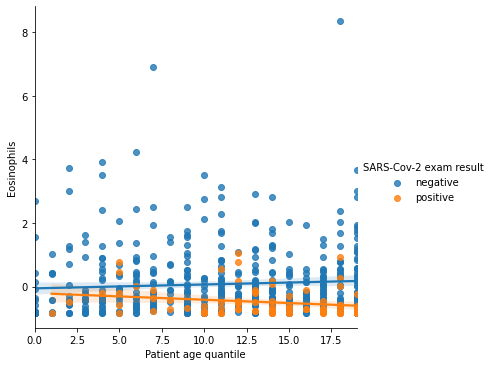

<Figure size 432x288 with 0 Axes>

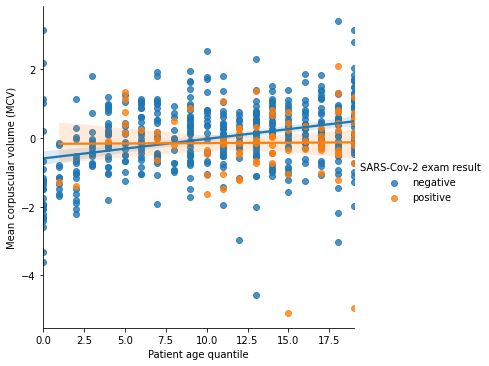

<Figure size 432x288 with 0 Axes>

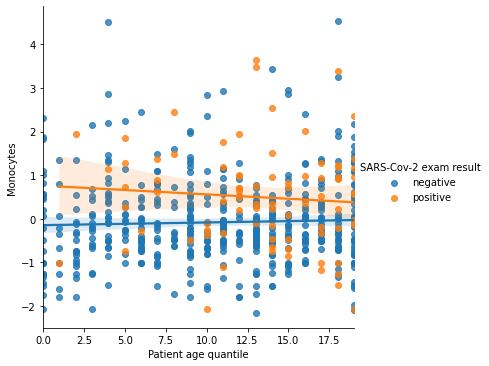

<Figure size 432x288 with 0 Axes>

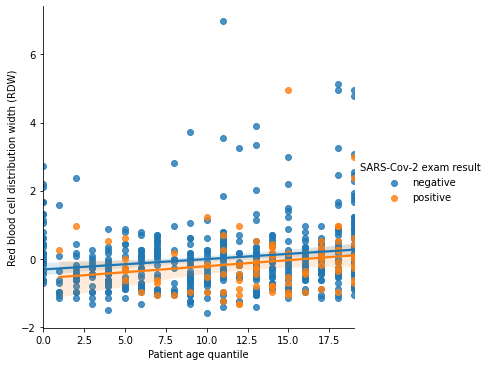

In [81]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x = 'Patient age quantile',y = col, hue = 'SARS-Cov-2 exam result', data=df) 

In [82]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

* Relation entre variables virales

In [83]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [84]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

* Relation viral.sanguin
Création d'une nouvelle variable "est malade" (autres maladies)

<AxesSubplot:>

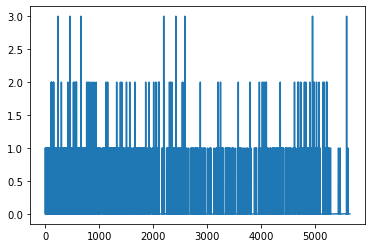

In [87]:
np.sum(df[viral_columns[:-2]] == "detected",axis=1).plot()

In [88]:
df['est_malade'] = np.sum(df[viral_columns[:-2]] == "detected",axis=1) >= 1

In [89]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [90]:
malade_df = df[df['est_malade'] == True]
non_malade_df = df[df['est_malade'] == False]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

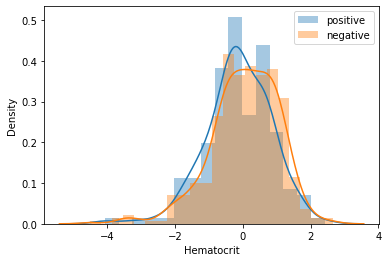

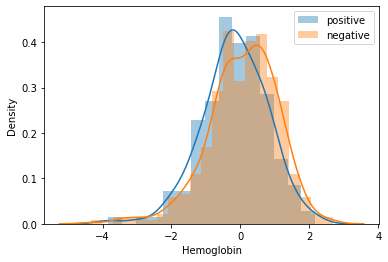

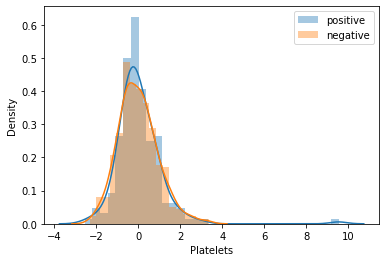

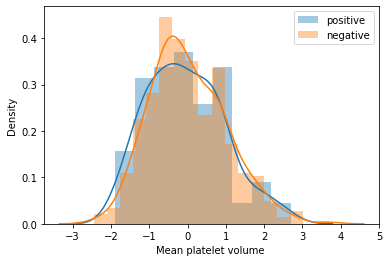

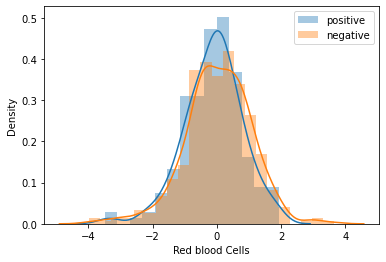

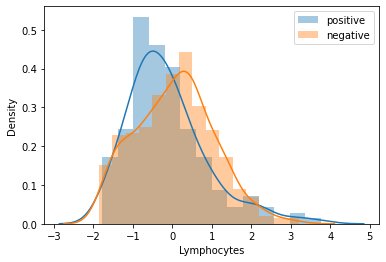

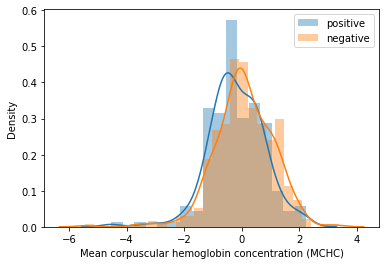

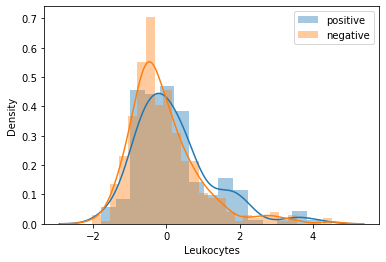

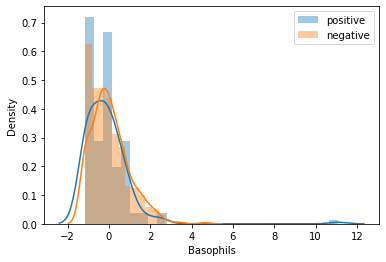

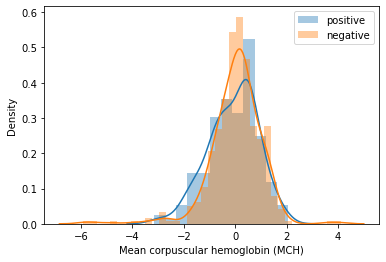

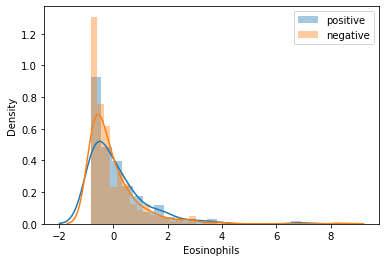

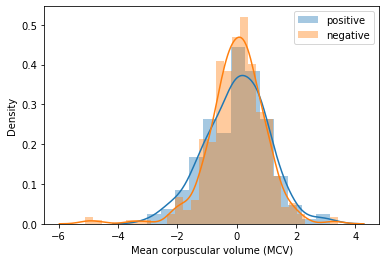

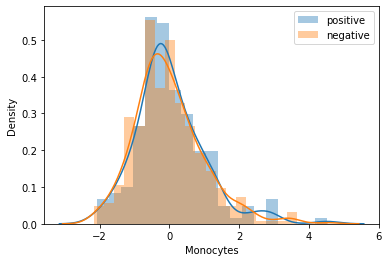

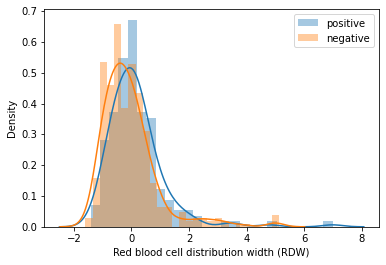

In [91]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col],label='positive')
    sns.distplot(non_malade_df[col],label='negative')
    plt.legend()

In [ ]:
# Les taux sanguins entre malades et covid-19 sont différents.

In [94]:
def hopsitalisastion(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'Soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'


In [95]:
df['statut'] = df.apply(hopsitalisastion,axis=1)
# mettre dans status les resultats de la fonction dans statut

In [97]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [ ]:
* Relation entre les taux sanguins patients et les différents services

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

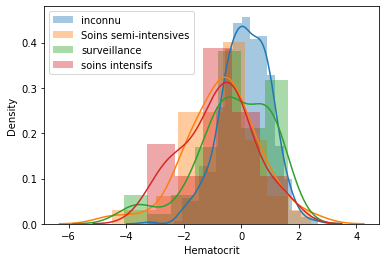

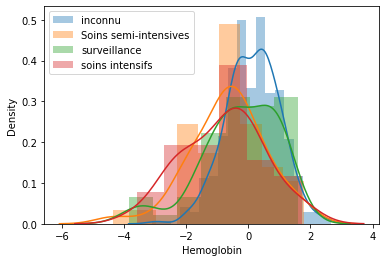

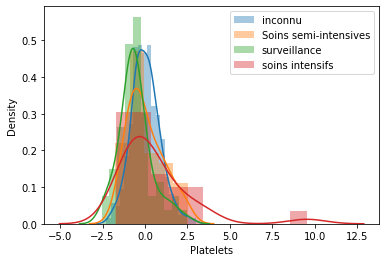

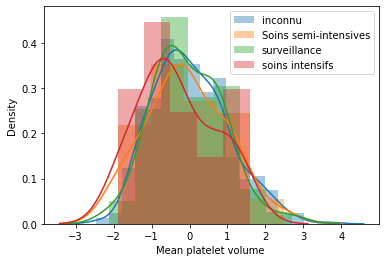

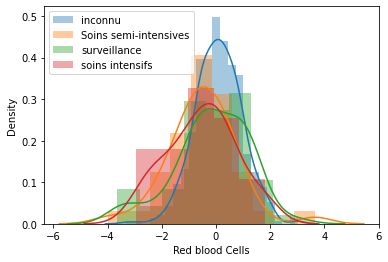

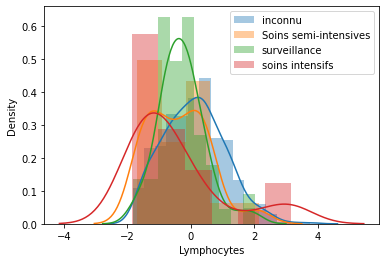

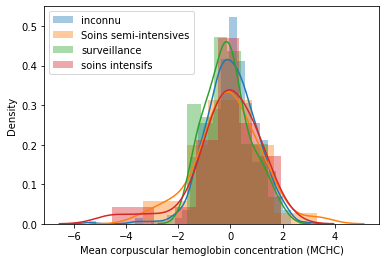

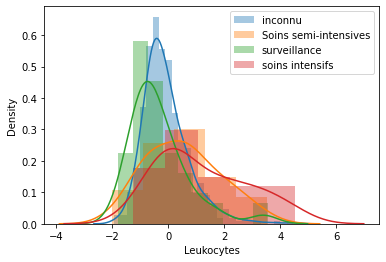

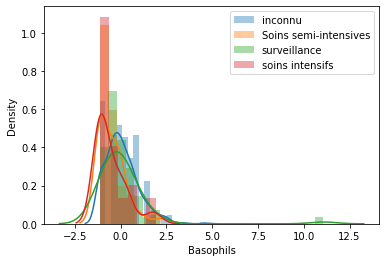

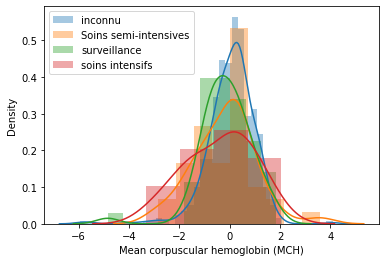

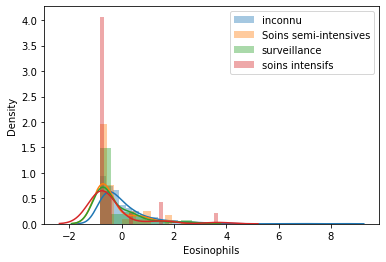

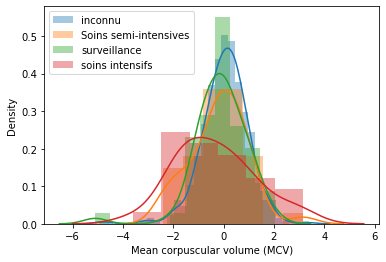

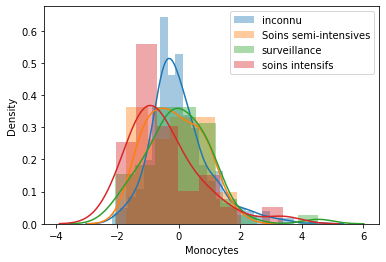

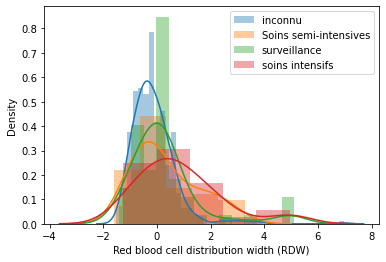

In [99]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

#### Analyse des valeurs manquantes

In [102]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [103]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [104]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [107]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [108]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [110]:
# L'état du target si on élimine certaines Ms values de certains groupes
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

<ipython-input-110-8aa311597185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [ ]:
# L'état du target si on élimine certaines Ms values de certains groupes
df1 = df[blood_columns]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

##### Test d'hypothèse
 Les individus atteints dy covid 19 ont des taux de leukocytes, Monocytes, plateles significativement différents :
 
    H0 : Les taux moyens sont EGAUX chez les individus positifs et négatifs

In [118]:
# T-test
from scipy.stats import ttest_ind

In [ ]:
# Pour les tests de students il est indiqué d'avoir un échantillon balancé.
# On va sampler les données pour avoir cet échantillon

In [111]:
positive_df.shape

(558, 38)

In [112]:
negative_df.shape

(5086, 38)

In [121]:
balance_neg = negative_df.sample(positive_df.shape[0])

In [122]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balance_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else :
        return 0
    

In [123]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejetée
Red blood cell distribution width (RDW)----------- 0


# 2. PRE-PREPROCESSING
**Objectifs**
1. Mettre les données dans un format propice au ML
* Train/test 

In [170]:
df = data.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

> Création des sous-ensembles ( Suite au EDA)

In [125]:
missing_rate = df.isna().sum()/df.shape[0]

In [130]:
blood_columns = list(blood_columns)
viral_columns = list(blood_columns)

In [128]:
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

In [171]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Hematocrit  Hemoglobin  Platelets  \
0                                      NaN         NaN         NaN        NaN   
1                                -0.625073    0.236515    -0.02234  -0.517413   
2                                      NaN         NaN         NaN        NaN   
3                                      NaN         NaN         NaN        NaN   
4                                      NaN         NaN         NaN        NaN   

   Mean platelet volume   Red blood Cells  Lymphocytes  \
0                    NaN              NaN          NaN   
1               0.010677         0.102004     0.318366   
2                    NaN              NaN          NaN   
3                    NaN              NaN          NaN   
4                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  
0                                      NaN  
1                                -0.625073  
2                             

In [133]:
from sklearn.model_selection import train_test_split

In [138]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [136]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [139]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

> Encodage
Création d'un dictionnaire qui va relier les catégories aux nombres

In [140]:
code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}

In [142]:
for col in df.select_dtypes('object'):
    df[col] = df[col].map(code)

<ipython-input-142-5bbc2fcd1a84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


In [144]:
df.dtypes.value_counts()

float64    28
int64       2
dtype: int64

In [146]:
def encodage(df):
    '''Permet encoder train test et test set'''
    code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}
    
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
    
    return df

In [149]:
def imputation(df):
    return df.dropna(axis=0)

In [152]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    return X,y

In [153]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [154]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-146-c1d8d44c7423>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


** Modélisation :** modèle pour avoir un appercu sur les variables les plus importantes

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
model = DecisionTreeClassifier(random_state=0)

** Procédure d'évaluation ** : On va utiliser la métrique F1 pour avoir une deal entre la précision et le recall

In [158]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [162]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[86  9]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        95
           1       0.40      0.38      0.39        16

    accuracy                           0.83       111
   macro avg       0.65      0.64      0.64       111
weighted avg       0.82      0.83      0.83       111



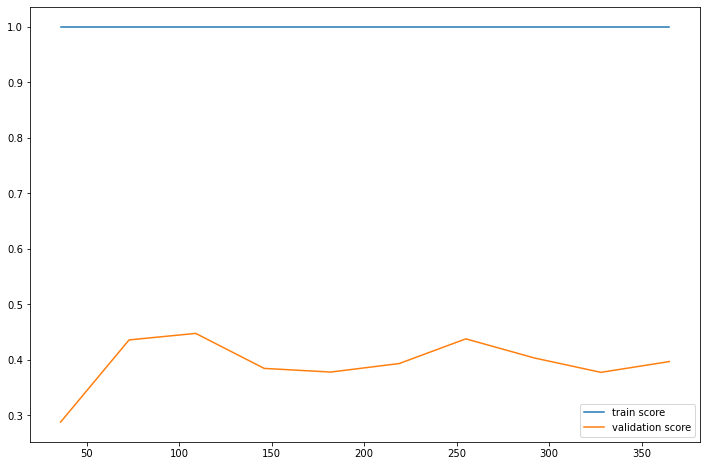

In [163]:
evaluation(model)

**Sur 97 négatifs :** on s'est trompé sur 9

**Sur 16 cas :** on a correctement identifié 6 (d'ou le recall de 38%, on a juste identifé 38%)

Diagnostic : le model à un score de 100% sur le train, mais incapable de généraliser sur le test.
    D'ou l'overfitting.
    Ainsi on peut commencer modifier le dataset pour pallier cette difficulté. Les procédures de correction :

1. Fournir plus de données : la fonction imputation est modifiée, (preprocessing basique pour améliorer au fur et en mesure). A la place d'utiliser le dropna, on utilise un fillna (remplir les valeurs du dataset avec une valeur extreme

In [164]:
def imputation(df):
    return df.fillna(-999)

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64
[[86  9]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.47      0.50      0.48        16

    accuracy                           0.85       111
   macro avg       0.69      0.70      0.70       111
weighted avg       0.85      0.85      0.85       111



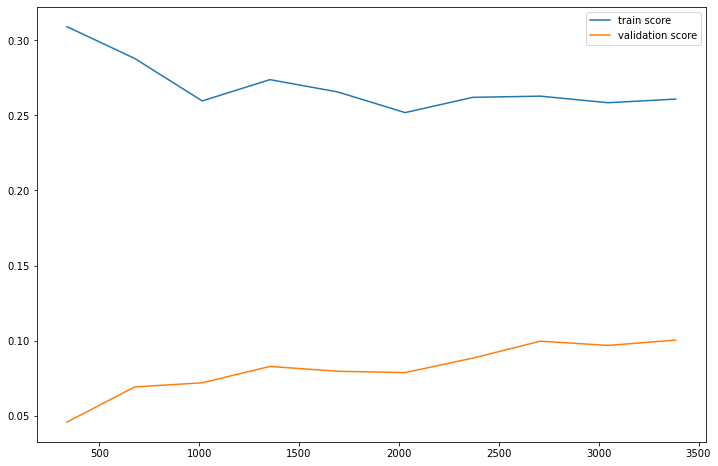

In [166]:
X_train, y_train = preprocessing(trainset)
evaluation(model)

On voit une baisse significative du train score. Donc avoir plus de données pourrait être très utile
Mais on ne peux pas juste se contenter d'un fillna pour prendre cette decision.
2. On laisse le fillna, on rajoute une variable qui indique si la variable est missing ou pas.

In [189]:
def imputation(df):
    df['is na'] = (df['Leukocytes'].isna())
    df = df.fillna(-999)
    return df

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64
[[86  9]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.47      0.50      0.48        16

    accuracy                           0.85       111
   macro avg       0.69      0.70      0.70       111
weighted avg       0.85      0.85      0.85       111



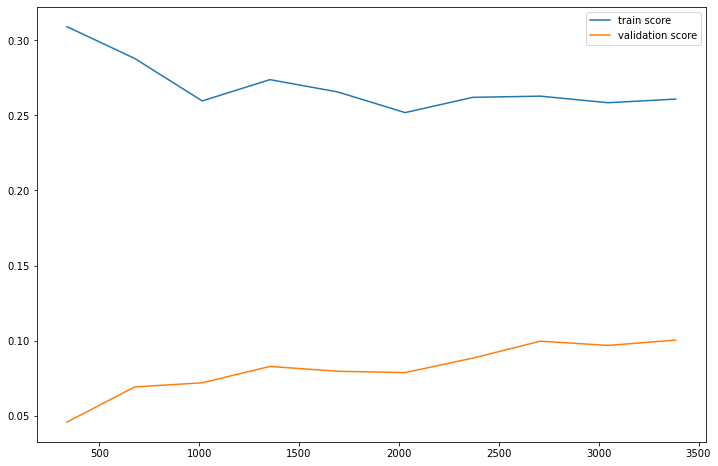

In [192]:
X_train, y_train = preprocessing(trainset)
evaluation(model)

Clairement le fillnan meme couplé à une missing indicator n'aide pas.

3. Selection de varaible : on revient avec l'idée de suppression des ms values, on va now utiliser l'attribut features importance qui dit quelles sont les vbles les  plus importantes dans la découpe de l'arbre de décision.

In [194]:
def imputation(df):
   # df['is na'] = (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [195]:
model.feature_importances_

array([0.05886359, 0.09069755, 0.        , 0.00879995, 0.        ,
       0.01352707, 0.02774107, 0.02996035, 0.05592599, 0.        ,
       0.04438571, 0.01183619, 0.        , 0.04055684, 0.01581147,
       0.01331571, 0.        , 0.08217487, 0.03550676, 0.02890762,
       0.01824746, 0.0292653 , 0.23424818, 0.02663143, 0.06637804,
       0.05834171, 0.        , 0.00887714, 0.        ])

On va injecter les resultats de cette sortie dans une df pandas dans lequel chaque valeur on aura la col associée.

<AxesSubplot:>

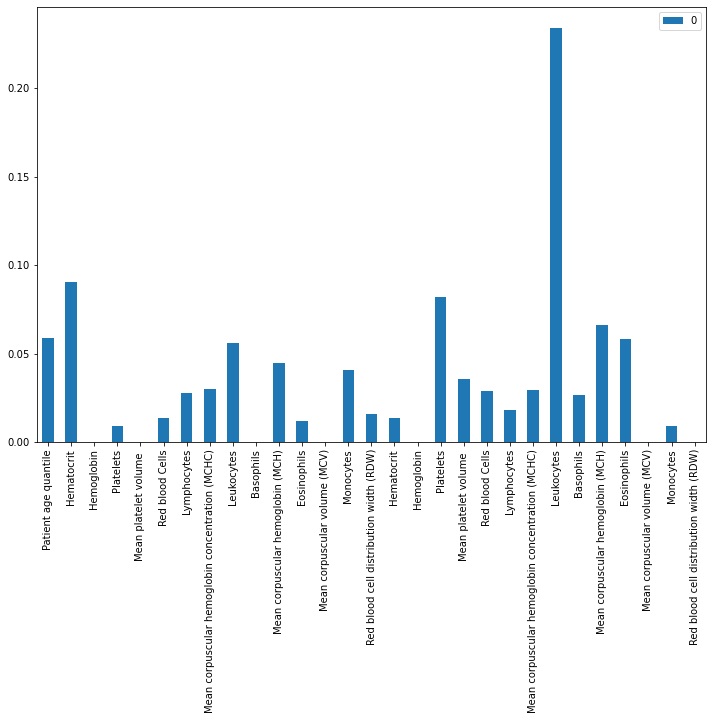

In [199]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

Graphique qui donne les variables les plus importantes de le model d'arbre de décision.
Pour notre model les vbles de type sang sont les plus importants, ce qui est en adhéquation avec les stats desc (les vbles qui discriminaient bien). Ainis on peut : définir un seuil en dessous du quel les vbles ne sont pas sélectionner. Une autre possibilité est de supprimer les vbles les moins importantes.

**1ere idée : Elimination des variables non importantes

In [201]:
df = df[key_columns + blood_columns]# + viral_columns]
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-146-c1d8d44c7423>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


In [202]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-146-c1d8d44c7423>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


[[86  9]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        95
           1       0.40      0.38      0.39        16

    accuracy                           0.83       111
   macro avg       0.65      0.64      0.64       111
weighted avg       0.82      0.83      0.83       111



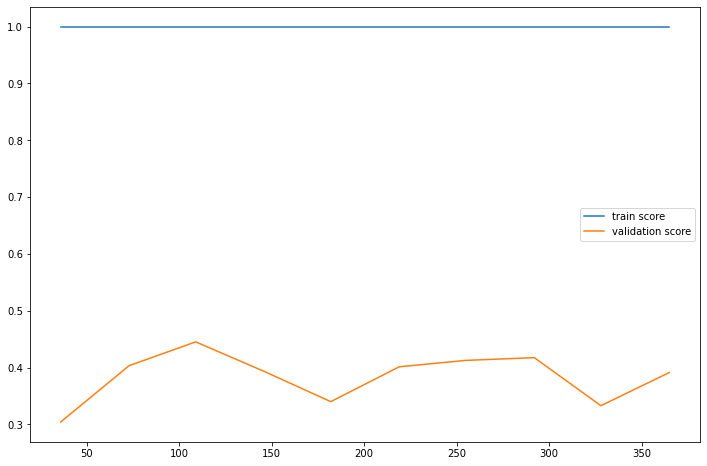

In [204]:
evaluation(model)

In [ ]:
Toujours le problème d'overfitting. 
* Utiliser un modèle régularisé qui lutte contre l'overfitting : la random forest.
Ace stade on ne règle pas les paramètres du modèle, mais plutot les performances du modèle quelconque.

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
model = RandomForestClassifier(random_state=0)

In [210]:
df = df[key_columns + blood_columns + viral_columns]
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-146-c1d8d44c7423>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


In [213]:
def feature_engineering(df): #Création d'autre variables
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns,axis=1)
    return df

In [214]:
def preprocessing(df):
    
    df = encodage(df)
    feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    return X,y

In [215]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-213-16b1a0fb2d17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1


In [216]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-146-c1d8d44c7423>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-213-16b1a0fb2d17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1


[[92  3]
 [14  2]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        95
           1       0.40      0.12      0.19        16

    accuracy                           0.85       111
   macro avg       0.63      0.55      0.55       111
weighted avg       0.80      0.85      0.81       111



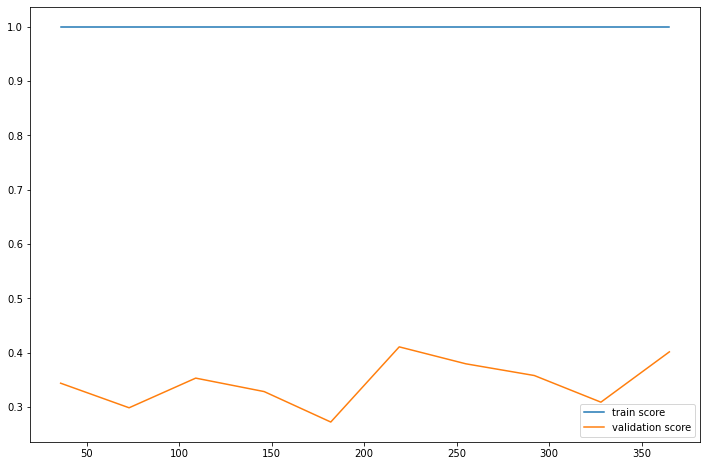

In [217]:
evaluation(model)

<AxesSubplot:>

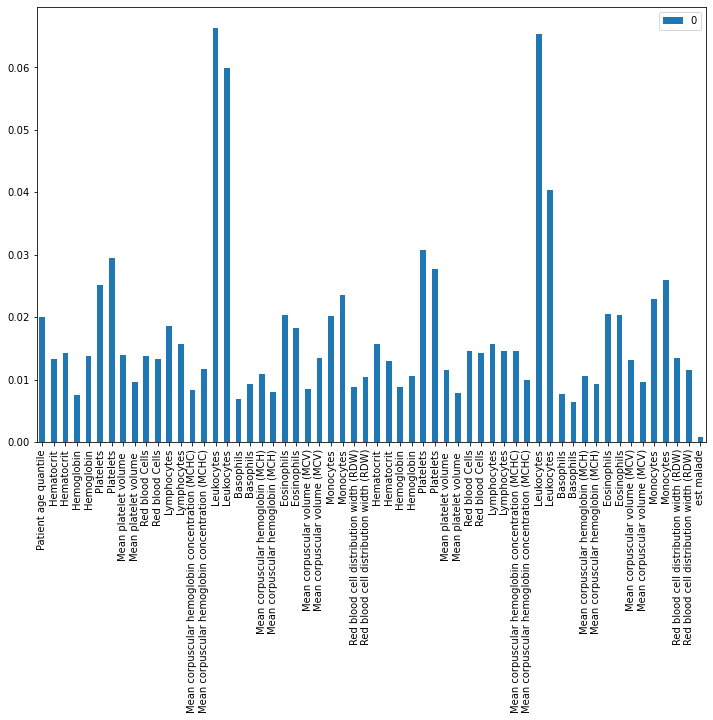

In [218]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

On peut utiliser select k best en étant cohérant entre le train test et le test set.

In [220]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #test anova

In [ ]:
model = make_pipeline(SelectKBest(f_classif, k=10),
                     RandomForestClassifier(random_state=0))

In [ ]:
evaluation(model)

In [223]:
model = make_pipeline(SelectKBest(f_classif, k=5),
                     RandomForestClassifier(random_state=0))

[[88  7]
 [13  3]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.30      0.19      0.23        16

    accuracy                           0.82       111
   macro avg       0.59      0.56      0.56       111
weighted avg       0.79      0.82      0.80       111



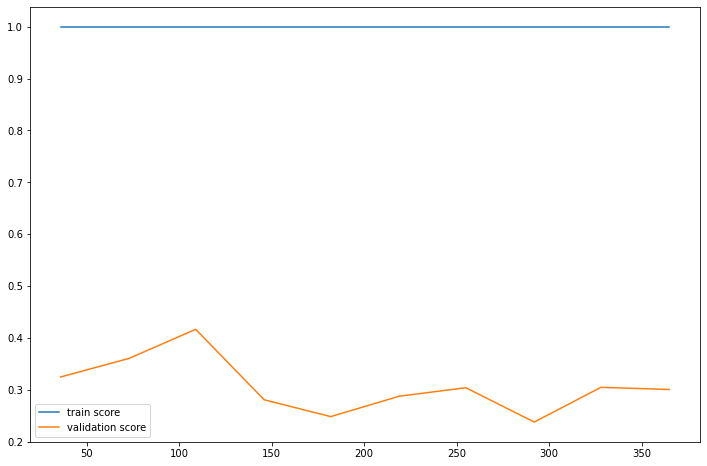

In [224]:
evaluation(model)

[[87  8]
 [14  2]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        95
           1       0.20      0.12      0.15        16

    accuracy                           0.80       111
   macro avg       0.53      0.52      0.52       111
weighted avg       0.77      0.80      0.78       111



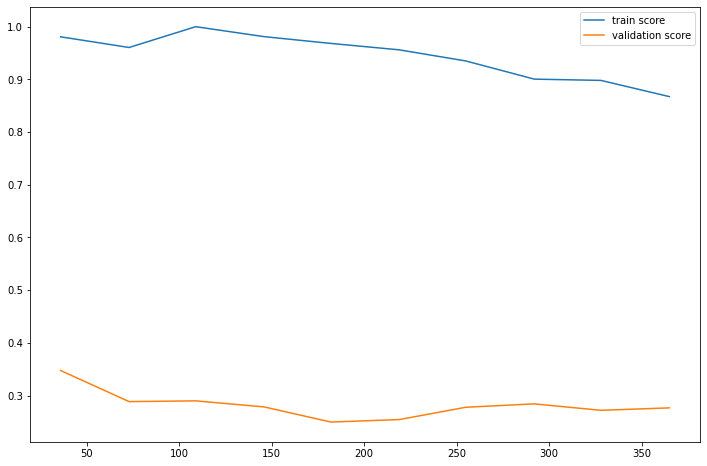

In [227]:
model = make_pipeline(SelectKBest(f_classif, k=4),
                     RandomForestClassifier(random_state=0))
evaluation(model)

On va maintenant créer un polynomial feature pour créer plein de variables suivit d'un pca ou d'un select kbest

In [228]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [229]:
model = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                     RandomForestClassifier(random_state=0))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[90  5]
 [13  3]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        95
           1       0.38      0.19      0.25        16

    accuracy                           0.84       111
   macro avg       0.62      0.57      0.58       111
weighted avg       0.80      0.84      0.81       111



C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn

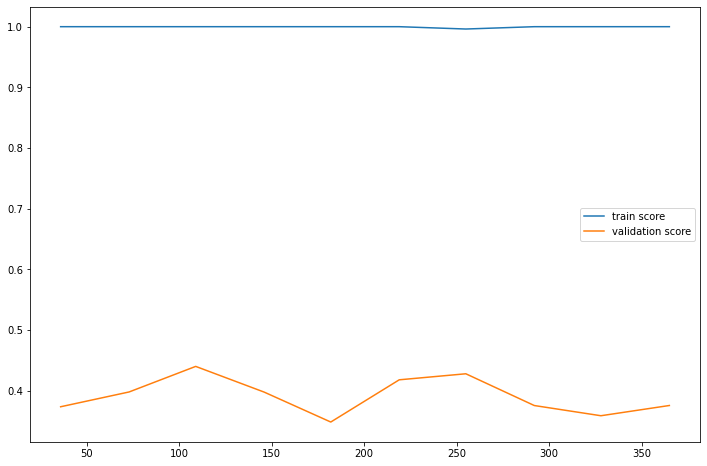

In [230]:
evaluation(model)

Faire une liste de model pour comparer leurs performances.


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
list_of_models = []

In [1]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bais=False), SelectKBest(f_classif, k=10))

NameError: name 'make_pipeline' is not defined

In [ ]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [ ]:
dict_of_model = {'RandomForest': RandomForest, 
                 'AdaBoost': AdaBoost, 
                 'SVM': SVM, 
                 'KNN':KNN}

In [ ]:
for name, model in dict_of_model.item( ):
    evaluation(model)

#### Optimisation
On va utiliser GridSearchCV pour l'optimisation des hyperparamètres. Pour ce faire on écrit toute la pipeline en entier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyper_params = {'svc__gamma':[1e - 3, 1e-4], 
               'svc__C':[1,10,100,1000]}

In [ ]:
grid = GridSearchCV(SVM, hyperparams, scoring='recall', cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
evaluation(grid.best)

Lorsqu'on a un domaine excessivement grand, il est conseillé d'utiliser RandomizeSearchCV, cet optimiseur va chercher de fa_on alea différentes combinaisons des hyperamètres.

In [ ]:
hyper_params = {'svc__gamma':[1e-3, 1e-4],
               'svc__C':[1, 10, 100, 1000],
               'pipeline__polynomialfeatures__degree':[2,3,4],
               'pipeline__selectkbest__k':range(4)}

In [ ]:
grid = RandomizeSearchCV(SVM, hyperparams, scoring='recall', 
                         cv=4, n_iter=40) # Nb de fois que le model fait la recherche alea

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
#### Precision Recall 